# Support Vector Machines - Support Vector Machines
## Exercises

## Fake wine

Most often, wine is adulterated by diluting it with cheaper products (such as juice), and sometimes with dangerous chemicals or sweeteners (to add color or flavor).

Another type of counterfeiting is the sale of cheaper wines under more expensive brands.

## Project goals

A wine distribution company recently encountered counterfeits. As a result, an audit of various wines was carried out using chemical analysis. The company exports very high-quality and expensive wines, but one of the suppliers tried to sell cheap wine under the guise of a more expensive one. A distribution company has hired you to create a machine learning model that will predict poor quality wine (i.e., “fake”). They want to know if it is possible to tell the difference between cheap and expensive wines.


Data source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**ASSIGNMENT: General Goal - Using the data below, develop a machine learning model that will predict, based on some chemical tests, whether a wine is real or fake. Complete the tasks below.**

---
---

## Complete the tasks written in bold

**Task: Run the cells below to import libraries and load data.**

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**Task: How many different values are in the target column quality, the values of which we will predict?**

In [17]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**TASK: Draw a countplot plot showing the counts for each of the categories - Legit and Fraud.**

<Axes: xlabel='quality', ylabel='count'>

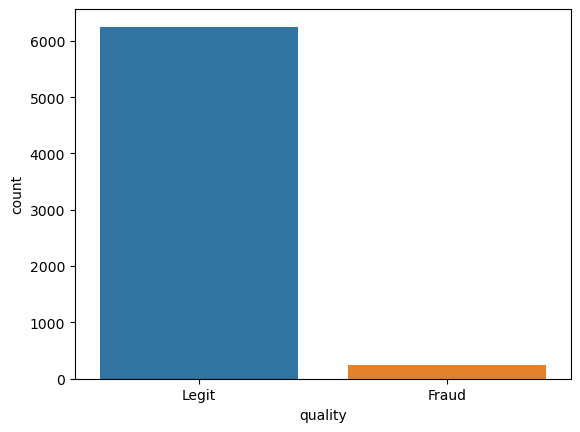

In [18]:
sns.countplot(data = df, x='quality')

**TASK: Let's find out if there is a difference in the number of fakes depending on whether the wine is red or white. Draw a countplot plotting the *type* of wine on the x-axis, and breaking down the Fraud and Legit values using the hue parameter.**

<Axes: xlabel='quality', ylabel='count'>

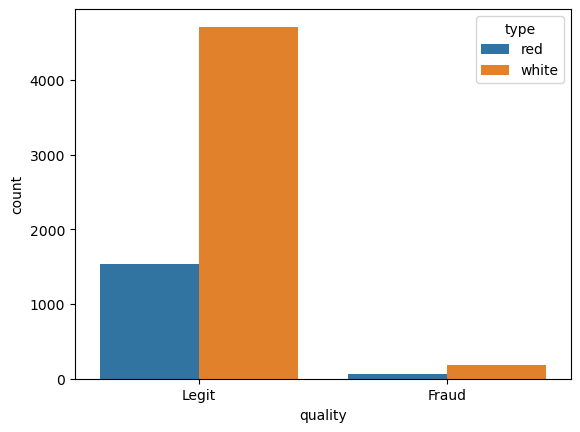

In [19]:
sns.countplot(data = df, x='quality', hue='type')

**TASK: What percentage of red wines are fake? What percentage of white wines are fake?**

In [20]:
fraud = df[df['quality']=='Fraud']
red_fraud = len(fraud[fraud['type']=='red'])
white_fraud= len(fraud[fraud['type']=='white'])

In [21]:
print(f"Percentage of fraud in Red Wines:{red_fraud/len(df[df['type']=='red']) * 100}")

Percentage of fraud in Red Wines:3.9399624765478425


In [22]:
print(f"Percentage of fraud in White Wines:{red_fraud/len(df[df['type']=='white']) * 100}")

Percentage of fraud in White Wines:1.2862392813393222


**TASK: Calculate the correlation between various characteristics and the “quality” column. To do this, you can use the values 0 and 1 instead of the text values Legit and Fraud.**

In [23]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [24]:
df.corr()["Fraud"]

/var/folders/9c/4rybkddd4vj2kzsbky4568cr0000gn/T/ipykernel_1149/3469284790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Fraud"]


fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**TASK: Draw a bar plot showing the correlation values for counterfeit wines.**

/var/folders/9c/4rybkddd4vj2kzsbky4568cr0000gn/T/ipykernel_1149/522251822.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Fraud"][:-1].sort_values().plot(kind='bar')


<Axes: >

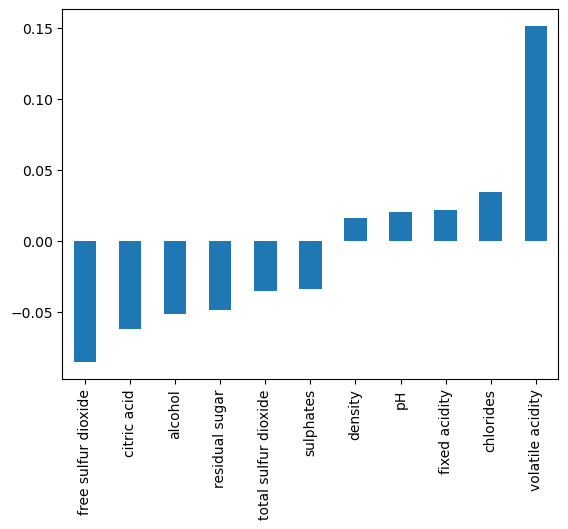

In [25]:
df.corr()["Fraud"][:-1].sort_values().plot(kind='bar')

**TASK: Draw a clustermap graph using seaborn to explore relationships between variables.**

/var/folders/9c/4rybkddd4vj2kzsbky4568cr0000gn/T/ipykernel_1149/885066453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data = df.corr())


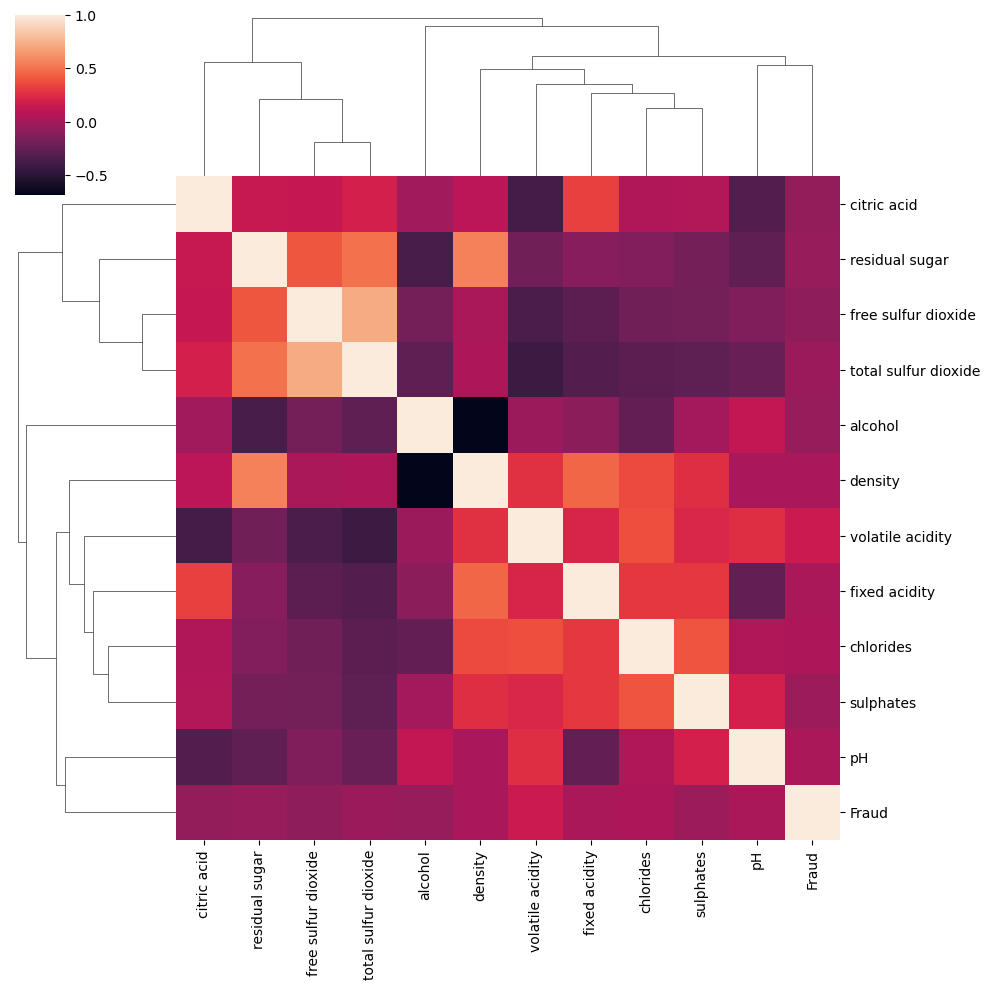

In [26]:
sns.clustermap(data = df.corr())

----
## Machine learning model

**Task: Convert the categorical column "type" from the text values "red" and "white" into dummy variables:**

In [27]:
numeric_df = df.select_dtypes(exclude='object')
object_df = df.select_dtypes(include='object')

In [28]:
dummies_object_df = pd.get_dummies(object_df, drop_first=True)

In [29]:
final_df = pd.concat([numeric_df,dummies_object_df], axis = 1)

**Task: Divide the data into features X and target variable y (column "quality")**

In [30]:
X = final_df.drop(["quality_Legit", 'Fraud', 'type_white'], axis=1)
y = final_df['quality_Legit']

**TASK: Split the data into a training and test set, with a ratio of 90% and 10%. Note - in the solution we use random state = 101**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Scale the data in the X train and X test sets.**

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit_transform(X_train)

array([[ 1.07925583,  2.11467205, -1.50654017, ...,  0.55963847,
         0.79094629, -0.79108083],
       [-0.31042998,  0.06596159,  1.46711941, ..., -0.92837614,
        -0.88029647, -0.91642732],
       [ 0.23000339,  1.1056057 ,  0.56810605, ...,  0.24963542,
         0.72409658,  1.08911644],
       ...,
       [ 0.84764153,  3.1237384 , -1.22992067, ...,  0.86964151,
         0.05559948, -0.33147705],
       [-0.69645381,  1.59484999, -1.50654017, ...,  2.04765307,
        -0.14494965,  1.3398094 ],
       [-0.07881568, -0.97368253,  1.19049991, ..., -1.05237735,
        -0.01125023,  0.67129482]])

In [36]:
scaler.transform(X_test)

array([[-0.31042998,  1.35022785, -0.67668168, ...,  1.11764394,
         1.92739138,  0.5877305 ],
       [-0.61924905, -0.2398161 ,  0.29148655, ...,  0.99364273,
        -0.01125023,  0.00278024],
       [-1.00527288, -1.03483807, -0.19259757, ...,  1.17964455,
        -1.34824445,  2.67683857],
       ...,
       [ 0.23000339, -0.30097163, -0.53837194, ..., -0.43237127,
        -0.47919821,  0.33703753],
       [-0.46483951, -0.36212717,  0.7064158 , ..., -0.49437188,
        -0.34549879, -0.91642732],
       [ 0.07559386, -0.48443824,  1.19049991, ...,  0.12563421,
         0.05559948,  0.25347321]])

**Task: Create an instance of the Support Vector Machine classifier. Previously, we left this model "empty" (that is, without parameters). However, since we know that classes are imbalanced, to solve this problem we can automatically adjust the weights inversely to how frequently the classes occur in the input variables by using a parameter in the SVC() method call. Check the SVC online documentation to find out what this parameter is.**

In [37]:
# Напишите Ваш код здесь
from sklearn.svm import SVC

In [38]:
SVC_model = SVC(class_weight='balanced')

**Task: Use GridSearchCV to search a grid of C and gamma parameter values.**

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C':[0.01,0.1,1], 'gamma':['scale', 'auto']}
grid_model = GridSearchCV(SVC_model, param_grid)

In [41]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': ['scale', 'auto']})

In [42]:
grid_model.best_estimator_

SVC(C=1, class_weight='balanced', gamma='auto')

**Task: Display the "confusion matrix" and "classification report" for your model.**

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
predictions = grid_model.predict(X_test)

In [45]:
confusion_matrix(y_test,predictions)

array([[  8,  19],
       [ 27, 596]])

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.23      0.30      0.26        27
           1       0.97      0.96      0.96       623

    accuracy                           0.93       650
   macro avg       0.60      0.63      0.61       650
weighted avg       0.94      0.93      0.93       650

